In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import time
import scipy.optimize as opt
import os

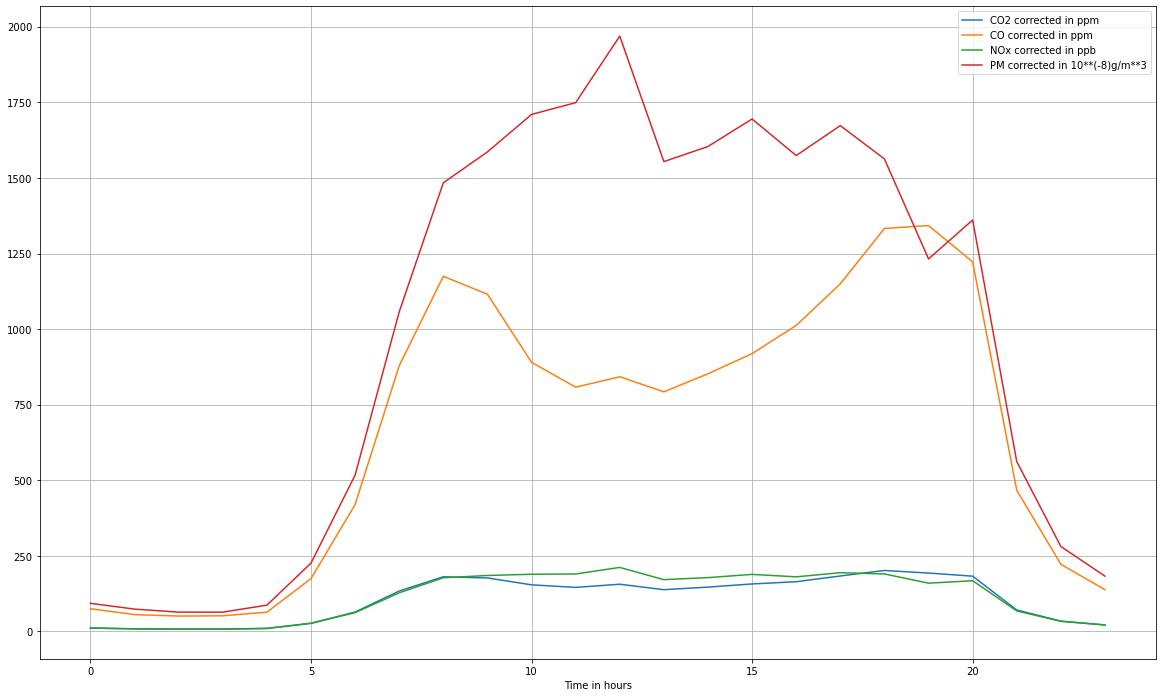

In [5]:
#import data

CO2=np.array([391.52,388.7,387.85,387.95,390.01,407.08,444.27,513.8,560.96,556.98,534.28,525.78,536.26,518.26,526.73,537.19,544.57,563.58,581.79,573.22,562.96,451.12,414.23,401.52])
CO=np.array([245.25,225.8,220.98,221.89,233.86,344.79,589.69,1048.77,1344.77,1285.35,1060.24,977.99,1012.36,962.59,1022.27,1088.99,1182.14,1319.92,1502.99,1512.38,1392.44,637.07,392.2,308.1])
NOx=np.array([31.16,28.76,27.71,27.7,30.22,46.94,82.27,147.9,197.66,205.17,209.29,210.15,231.89,191.43,198.14,208.81,200.69,214.44,210.3,179.77,187.81,87.98,53.6,41.69])
PM=np.array([10.93,10.74,10.64,10.64,10.87,12.26,15.17,20.57,24.84,25.86,27.1,27.49,29.69,25.54,26.04,26.95,25.74,26.73,25.63,22.32,23.61,15.62,12.81,11.83])

traffic=np.array([175,127,114,113,140,357,812,1660,2000,1890,1566,1510,1498,1504,1587,1602,1780,1834,1937,1827,1692,649,292,179])

t = np.arange(len(CO2))

#correct data

CO2_cor = CO2 - 380 
CO_cor = CO - 170
NOx_cor = NOx - 20
PM_cor = PM - 10 

#plot data

fig, ax = plt.subplots(figsize = (20,12))
plt.plot(t, CO2_cor, label = 'CO2 corrected in ppm')
plt.plot(t, CO_cor, label = 'CO corrected in ppm')
plt.plot(t, NOx_cor, label = 'NOx corrected in ppb')
plt.plot(t, PM_cor*100, label = 'PM corrected in 10**(-8)g/m**3')
plt.legend()
plt.grid()
plt.xlabel('Time in hours')
plt.show()

**TASK 2**

In [26]:
def convert_mixrat_concentration (mixrat, molmas, p, temp):
    Na = 6.02214076 * 10**(23) #number of molecules in one mol
    R = 8.314463 #in J/(mol*K)
    molmas_air = 28.0134
    con = (p)/(R*temp*molmas) * mixrat * 10**6 #for converting into micrograms
    return con

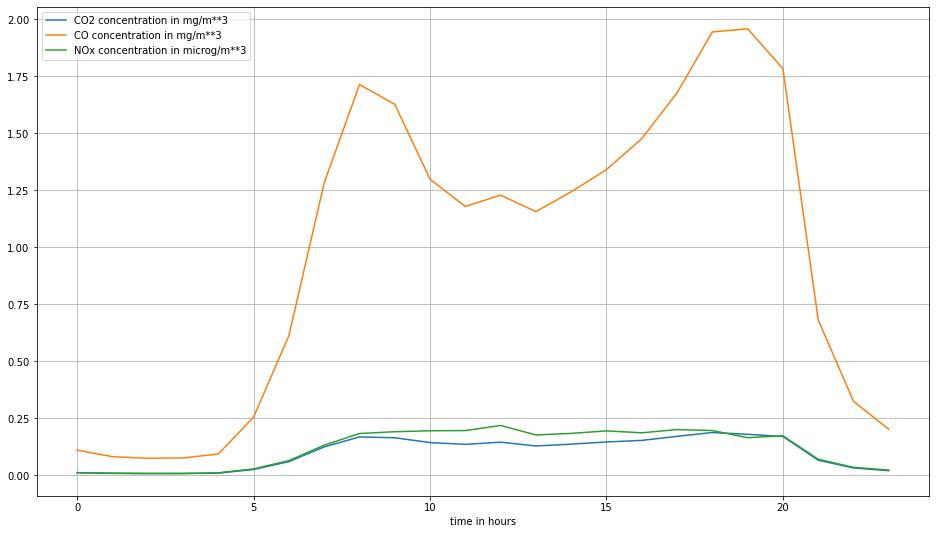

In [33]:
#get concentrations

CO2_con = convert_mixrat_concentration(CO2_cor/10**6, 44.01, 101325, 25+273.15)
CO_con = convert_mixrat_concentration(CO_cor/10**6, 28.01, 101325, 25+273.15)
NO2_con = convert_mixrat_concentration(NOx_cor/10**9*0.7, 46.01, 101325, 25+273.15)
NO_con = convert_mixrat_concentration(NOx_cor/10**9*0.3, 30.01, 101325, 25+273.15)
NOx_con = NO_con + NO2_con

#plot concentrations

fig2, ax2 = plt.subplots(figsize=(16,9))
plt.plot(t, CO2_con/10**3, label = 'CO2 concentration in mg/m**3')
plt.plot(t, CO_con/10**3, label = 'CO concentration in mg/m**3')
plt.plot(t, NOx_con, label = 'NOx concentration in microg/m**3')
#plt.plot(t, PM_cor*10, label = 'PM corrected in 10**(-7)g/m**3')
plt.legend()
plt.grid()
plt.xlabel('time in hours')
plt.show()

**TASK 3**

In [22]:
fd = 4.9 #l/100km
fg = 5.6 #l/100km
em_CO2_g = 2.35 #g/l
em_CO2_d = 2.69 #g/l

#em rates in g/km:

em_rate_CO2_g = em_CO2_g * fg /100
em_rate_CO2_d = em_CO2_d * fd /100
emCO2 =  (em_rate_CO2_d + em_rate_CO2_g )/2

print('emission rate CO2 diesel: %f \t emission rate CO2 gasoline: %f in g/km' %(em_rate_CO2_d, em_rate_CO2_g))
print('emission rate CO2 average: %f in g/km' %((em_rate_CO2_d + em_rate_CO2_g )/2))

emission rate CO2 diesel: 0.131810 	 emission rate CO2 gasoline: 0.131600 in g/km
emission rate CO2 average: 0.131705 in g/km


**TASK 4**

<ipython-input-41-8bf915f72055>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  par, res, rank, sing_val = np.linalg.lstsq(emissionrates, b)


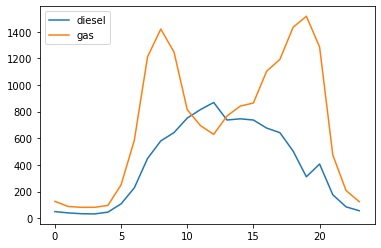

In [41]:
CO2_con2 = CO2_cor * 2
CO_con2 = CO_cor * 2
NOx_con2 = NOx_cor * 2
PM_con2 = PM_cor * 2

emissionrates=np.array([[0.5,1.0],[0.25,0.08],[0.025,0.005]])

source_strength_CO2 = emCO2 * traffic

d = CO2_con2 / source_strength_CO2

b = np.vstack((CO_con2/d, NOx_con2/d, PM_con2/d))
par, res, rank, sing_val = np.linalg.lstsq(emissionrates, b)

diesel_car = par[0]
gas_car = par[1]

plt.plot(t, diesel_car, label = 'diesel')
plt.plot(t, gas_car, label = 'gas')
plt.legend()

**Task 5**

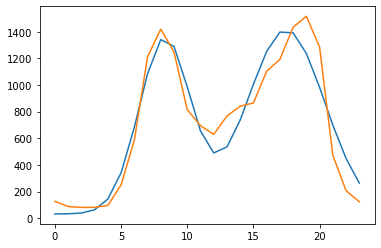

In [54]:
# fit two gaussian curves

fit_func = lambda t, off, xm1, s1, a1, xm2 , s2, a2: off + a1 * np.exp(-(t-xm1)**2/(2*s1**2)) + a2 * np.exp(-(t-xm2)**2/(2*s2**2)) 

opt_par, opt_cov = opt.curve_fit(fit_func, t, gas_car)

opt_par

plt.plot(fit_func(t,  *opt_par))
plt.plot(gas_car)